In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

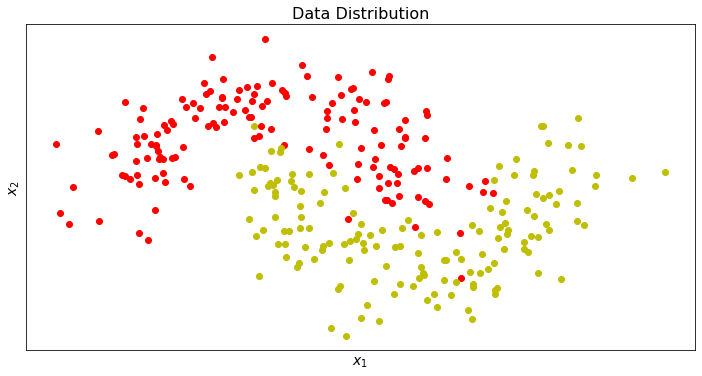

In [2]:
X, y = make_moons(300, noise=0.25, random_state=0)

plt.figure(figsize=(12, 6))
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "ro")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")
plt.title("Data Distribution", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
def decision_boundary_decision_tree(clf, X, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()

In [6]:
%%time

param_grid = {'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

dt_clf = DecisionTreeClassifier()

dt_clf_cv = GridSearchCV(dt_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
dt_clf_cv.fit(X_train, y_train)

params_optimal = dt_clf_cv.best_params_

print("Best Score (accuracy): %f" % dt_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.3s


Best Score (accuracy): 0.973277
Optimal Hyperparameter Values:  {'max_depth': 7, 'min_samples_leaf': 3}


CPU times: user 363 ms, sys: 83.7 ms, total: 447 ms
Wall time: 2.76 s


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    2.7s finished


In [7]:
tree_clf = DecisionTreeClassifier(**params_optimal)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)

In [8]:
y_test_predicted = tree_clf.predict(X_test)

test_accuracy_tuned = accuracy_score(y_test, y_test_predicted)
print("Test Accuracy: ", test_accuracy_tuned)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Test Accuracy:  0.9333333333333333

Test Confusion Matrix:
[[34  3]
 [ 1 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.88      0.96      0.92        23

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



In [9]:
tree_clf_untuned = DecisionTreeClassifier(random_state=42)
tree_clf_untuned.fit(X_train, y_train)

y_test_predicted_untuned = tree_clf_untuned.predict(X_test)

test_accuracy_untuned = accuracy_score(y_test, y_test_predicted_untuned)
print("Test Accuracy: ", test_accuracy_untuned)

Test Accuracy:  0.9166666666666666


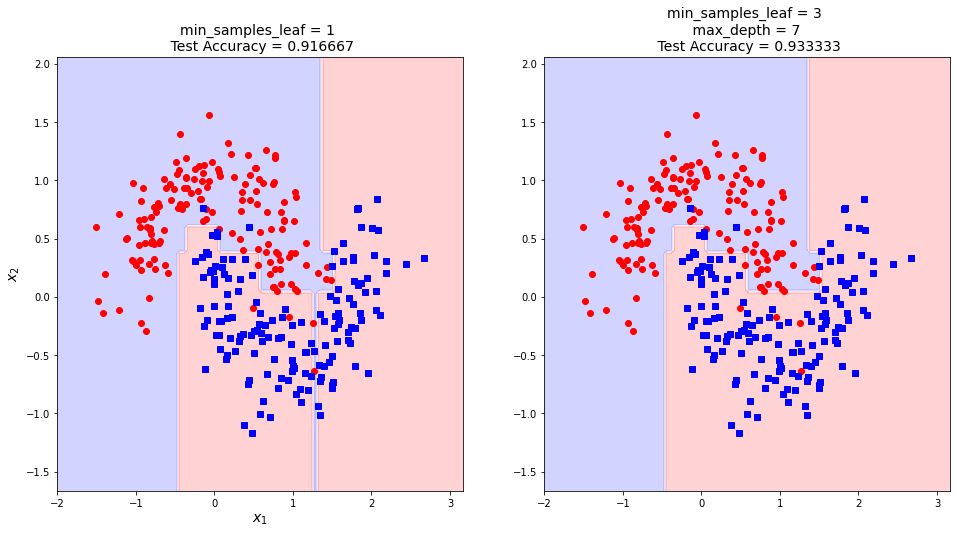

In [10]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
decision_boundary_decision_tree(tree_clf, X)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.title("min_samples_leaf = %d \n Test Accuracy = %f" 
          % (tree_clf_untuned.min_samples_leaf, test_accuracy_untuned), fontsize=14)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.subplot(122)
decision_boundary_decision_tree(tree_clf_untuned, X)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.title("min_samples_leaf = %d \n max_depth = %d \n Test Accuracy = %f" 
          % (tree_clf.min_samples_leaf, tree_clf.max_depth, test_accuracy_tuned), fontsize=14)

plt.show()